<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> <!-- Темно-серый цвет текста -->

$$ **Содержание** $$

-   **Введение**
-   **Описание данных**
-   **Импорт библиотек**
-   **Загрузка данных**
-   **Общая информация**
-   **Изменение названия столбцов**
-   **Exploratory data analysis и Визуализация**
- - **Проверка распределений в признаках на нормальность**
- - **Распределения переменных в датафрейме**
- - **Тепловая карта**
- - **Коэффицент корреляции пирсона**
-   **Анализ целевой переменной**
-   **Предварительная обработка данных:**
- - Изменим диапазона оценки
- - Определяем зависимую и независимые переменные
- - Стандартизация
- **ПОСТРОЕНИЕ МОДЕЛЕЙ**
- - Модель K-ближайших соседей (KNN)
- - Модель Gradient Boosting Machines (GBM)
-   **Оценка качества лучшей модели**
-   **Построение графика ROC-AUC**

</div>

# $Введение$

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Для того чтобы оценить качество вина на конечной стадии производства нужно учесть множество факторов. Для проверки качества вина проводятся большое количество исследований и входных параметров: органолептическая оценка, физико-химического состава, происхождение сорта винограда, климатические условия произрастания плода, условия хранения и т.д. Бесчисленное множество параметров собираются в одной бутылке и позволяют сделать вывод какой мы получили продукт – удачный или неудачный.

В данном исследовании будет рассмотрен набор данных содержащий химический состав красного вина с севера Португалии "Vinho Verde" и вкусовую оценку от сомелье.

Наше исследование разделено на несколько важных частей.

*Часть 1.*  
Проведении разведочного анализа данных, данный этап позволит нам глубже понять структуру предоставленного датасета. Мы постараемся выявить скрытые закономерности и неожиданные инсайты, которые помогут нам сформулировать более информативные выводы о качестве вина, а также помогут обоснованно прозвести математическое моделирование.

*Часть 2.*  
После разведочного анализа мы построим модель, которая определить качество вина на основе проведенных физико-химических тестов. Основная цель созданного инструмента, является определение качества вина на основе собранных данных. Данная задача будет рещаться с помощью методов классификации.



Пожалуйста, включите эту цитату, если вы планируете использовать эту базу данных: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
</div>


# $Описание~содержания~столбцов~таблицы:$

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
    
1. `Fixed acidity` (фиксированная кислотность)
2. `Volatile acidity` (летучая кислотность)
3. `Citric acid` (лимонная кислота)
4. `Residual sugar` (остаточный сахар)
5. `Chlorides` (хлориды)
6. `Free sulfur dioxide` (свободный диоксид серы)
7. `Total sulfur dioxide` (суммарный диоксид серы)
8. `Density` (плотность)
9. `pH`
10. `Sulphates` (сульфаты)
11. `Alcohol` (спирт)
12. `Quality` (оценка качества от 0 до 10)

</div>

# $Импорт~библиотек$

In [1]:
# Библиотеки для обработки данных
import pandas as pd
import numpy as np

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Статистические модели и тесты
import statsmodels.api as sm
import scipy.stats as st

# Методы машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

# Библиотека для градиентного бустинга
from lightgbm import LGBMClassifier

# Константы
COLOR = (0.55, 0, 0.1)
RANDOM_STATE = 32

# $Загрузка~дананных$

In [2]:
wine = pd.read_csv("C:/Users/Pisuk/Downloads/winequality-redd.csv",  sep=';')
df = wine.copy()
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.shape

(1599, 12)

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
В приведенном выше блоке кода мы загрузили набор данных. Затем, на всякий случай, получаем копию данных. Потому что в некоторых случаях у нас может возникнуть необходимость использовать исходный набор данных.
</div >

# $Общая~информация$

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#     Проверка наличия пропусков
if df.isna().sum().sum() == 0:
    print('Нет пропусков!')
else:
    print('Количество пропусков в столбцах:')
    print(df.isna().sum())


Нет пропусков!


<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 

**Краткий вывод:**
Всего в таблице 1599 строк. Все типы данных корректны и являются числовыми. Данные не имеют пропусков.
</div>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 100%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 

**Вывод по данной статистики:**
- Среднее значение фиксированной кислотности — 8,31, максимальное значение — 15,9.
- Среднее значение летучей кислотности — 0,52, максимальное значение — 1,58.
- Среднее значение лимонной кислоты — 0,27, максимальное значение — 1.
- Среднее значение остаточного сахара — 2,53, максимальное значение — 15,5.
- Среднее значение хлоридов 0,08, максимальное значение 0,61.
- Среднее значение свободного диоксида серы — 15,87, максимальное значение — 72.
- Среднее значение общего диоксида серы — 46,46, максимальное значение — 289.
- Среднее значение плотности 0,99, максимальное значение 1.
- Среднее значение pH — 3,31, максимальное значение — 4,01.
- Среднее значение сульфатов 0,65, максимальное значение 2.
- Средняя ценность алкоголя — 10,42, наивысшая — 14,90.
- Среднее значение качества – 5,63, высшее значение – 8.
</div>

# $Изменение~названия~столбцов$


In [7]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

# $Exploratory~data~analysis~(EDA)~и~Визуализация$

## Проверка распределений в признаках на нормальность

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Рассмотрим распределение признаков с помощью гистограмм и графика Q-Q plot
</din>

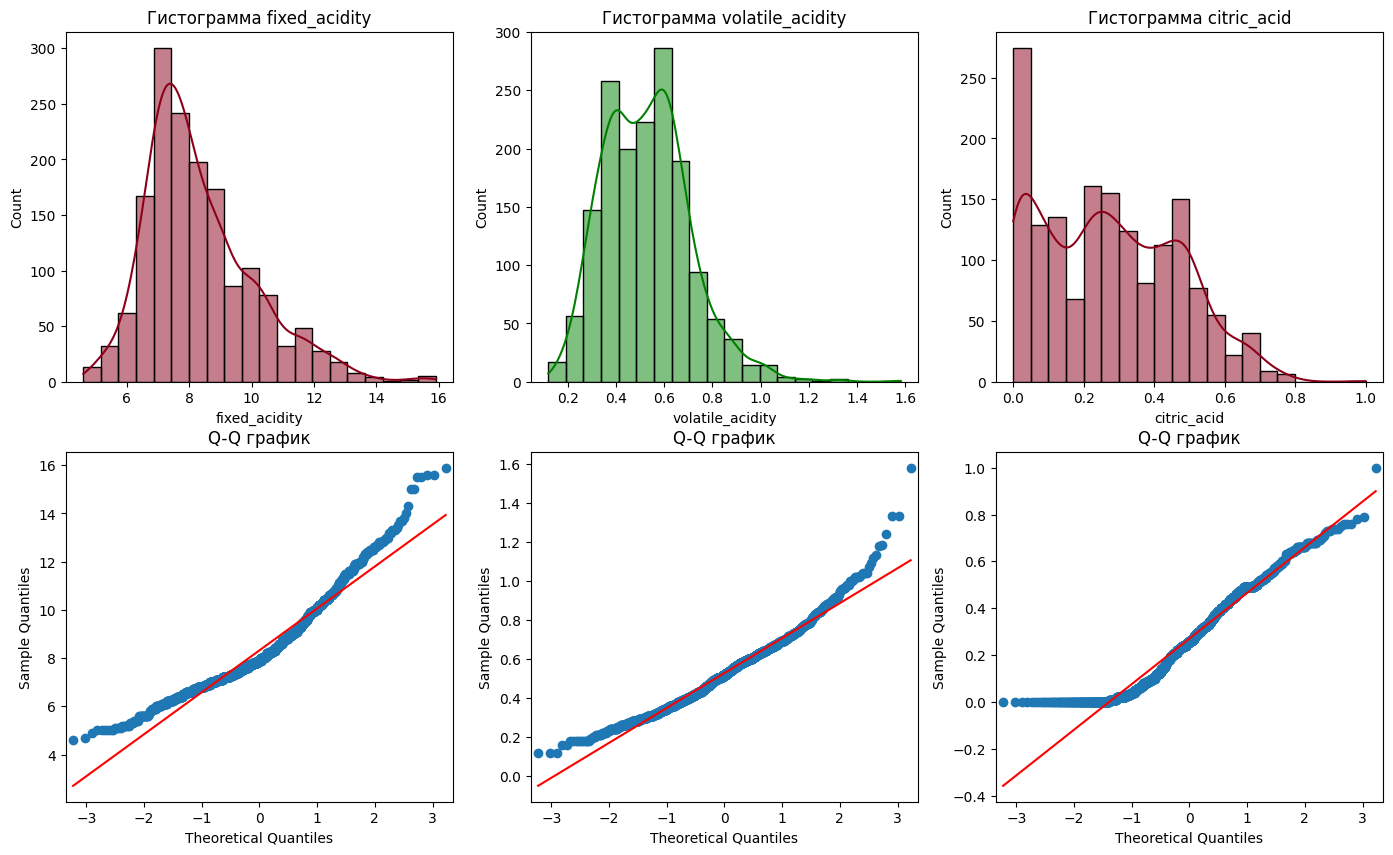

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

# Hist
sns.histplot(ax = axes[0, 0],
             x = df['fixed_acidity'],
             bins=20,
             kde=True,
             color=COLOR).set_title('Гистограмма fixed_acidity')

sns.histplot(ax = axes[0, 1],
             x = df['volatile_acidity'],
             bins=20,
             kde=True,
             color='g').set_title('Гистограмма volatile_acidity')

sns.histplot(ax = axes[0, 2],
             x = df['citric_acid'],
             bins=20,
             kde=True,
             color=COLOR).set_title('Гистограмма citric_acid')

# Q-Q графики
sm.qqplot(df['fixed_acidity'], line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q график')

sm.qqplot(df['volatile_acidity'], line='s', ax=axes[1, 1])
axes[1, 1].set_title('Q-Q график')

sm.qqplot(df['citric_acid'], line='s', ax=axes[1, 2])
axes[1, 2].set_title('Q-Q график')

plt.show()

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">          
Анализируя приведенные здесь графики, оказывается, что значения переменной `fixed_acidity` распределены относительно нормально (но немного смещены влево). Но есть два пика в распределениях других переменных `volatile_acidity` и `citric_acid`.

</din>

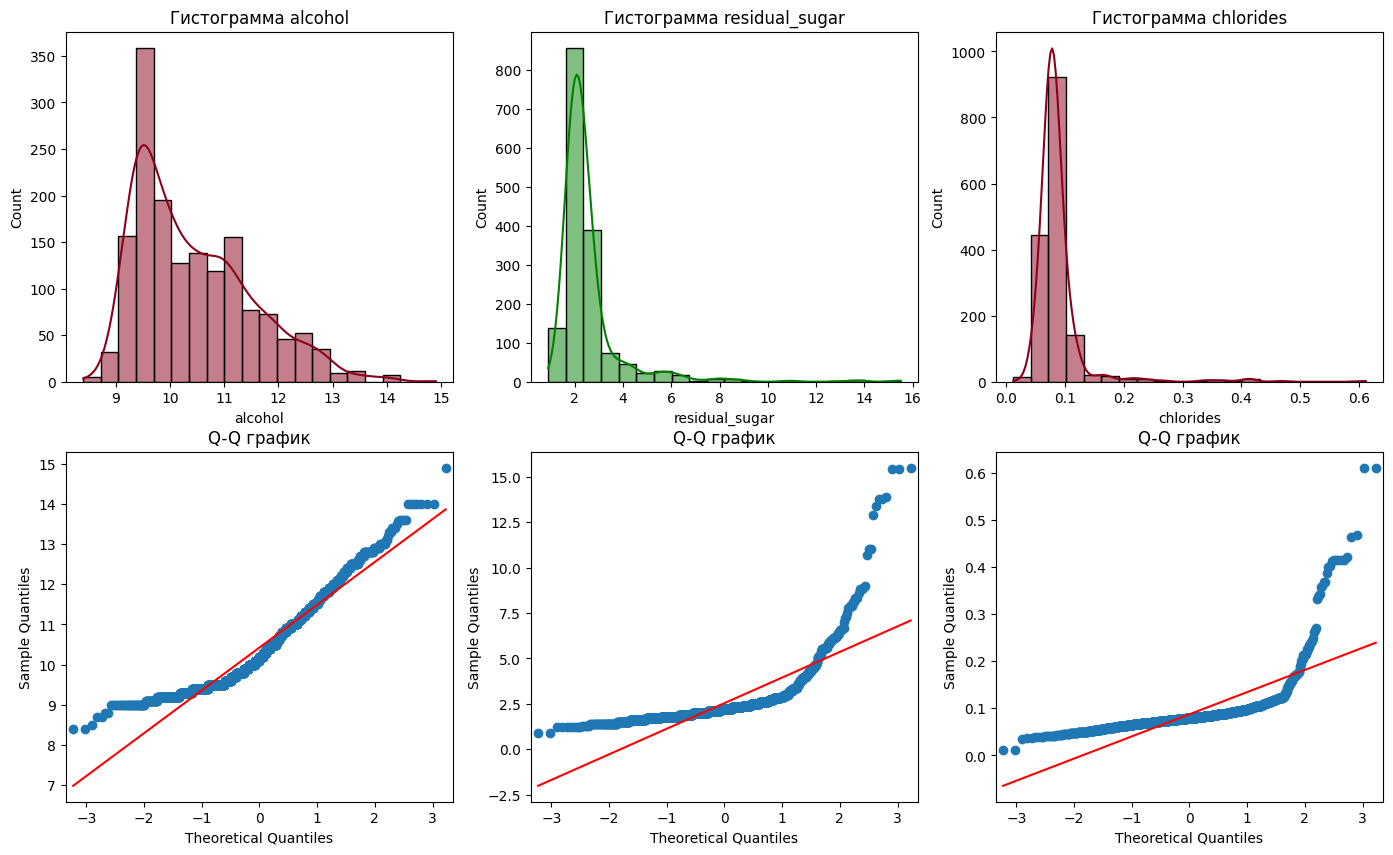

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

# Hist
sns.histplot(ax = axes[0, 0],
             x = df['alcohol'],
             bins=20,
             kde=True,
             color=COLOR).set_title('Гистограмма alcohol')

sns.histplot(ax = axes[0, 1],
             x = df['residual_sugar'],
             bins=20,
             kde=True,
             color='g').set_title('Гистограмма residual_sugar')

sns.histplot(ax = axes[0, 2],
             x = df['chlorides'],
             bins=20,
             kde=True,
             color=COLOR).set_title('Гистограмма chlorides')

# Q-Q графики
sm.qqplot(df['alcohol'], line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q график')

sm.qqplot(df['residual_sugar'], line='s', ax=axes[1, 1])
axes[1, 1].set_title('Q-Q график')

sm.qqplot(df['chlorides'], line='s', ax=axes[1, 2])
axes[1, 2].set_title('Q-Q график')

plt.show()

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">           
Анализируя данные переменные видно что они распределены не нормально
</din>

## Распределения переменных в датафрейме

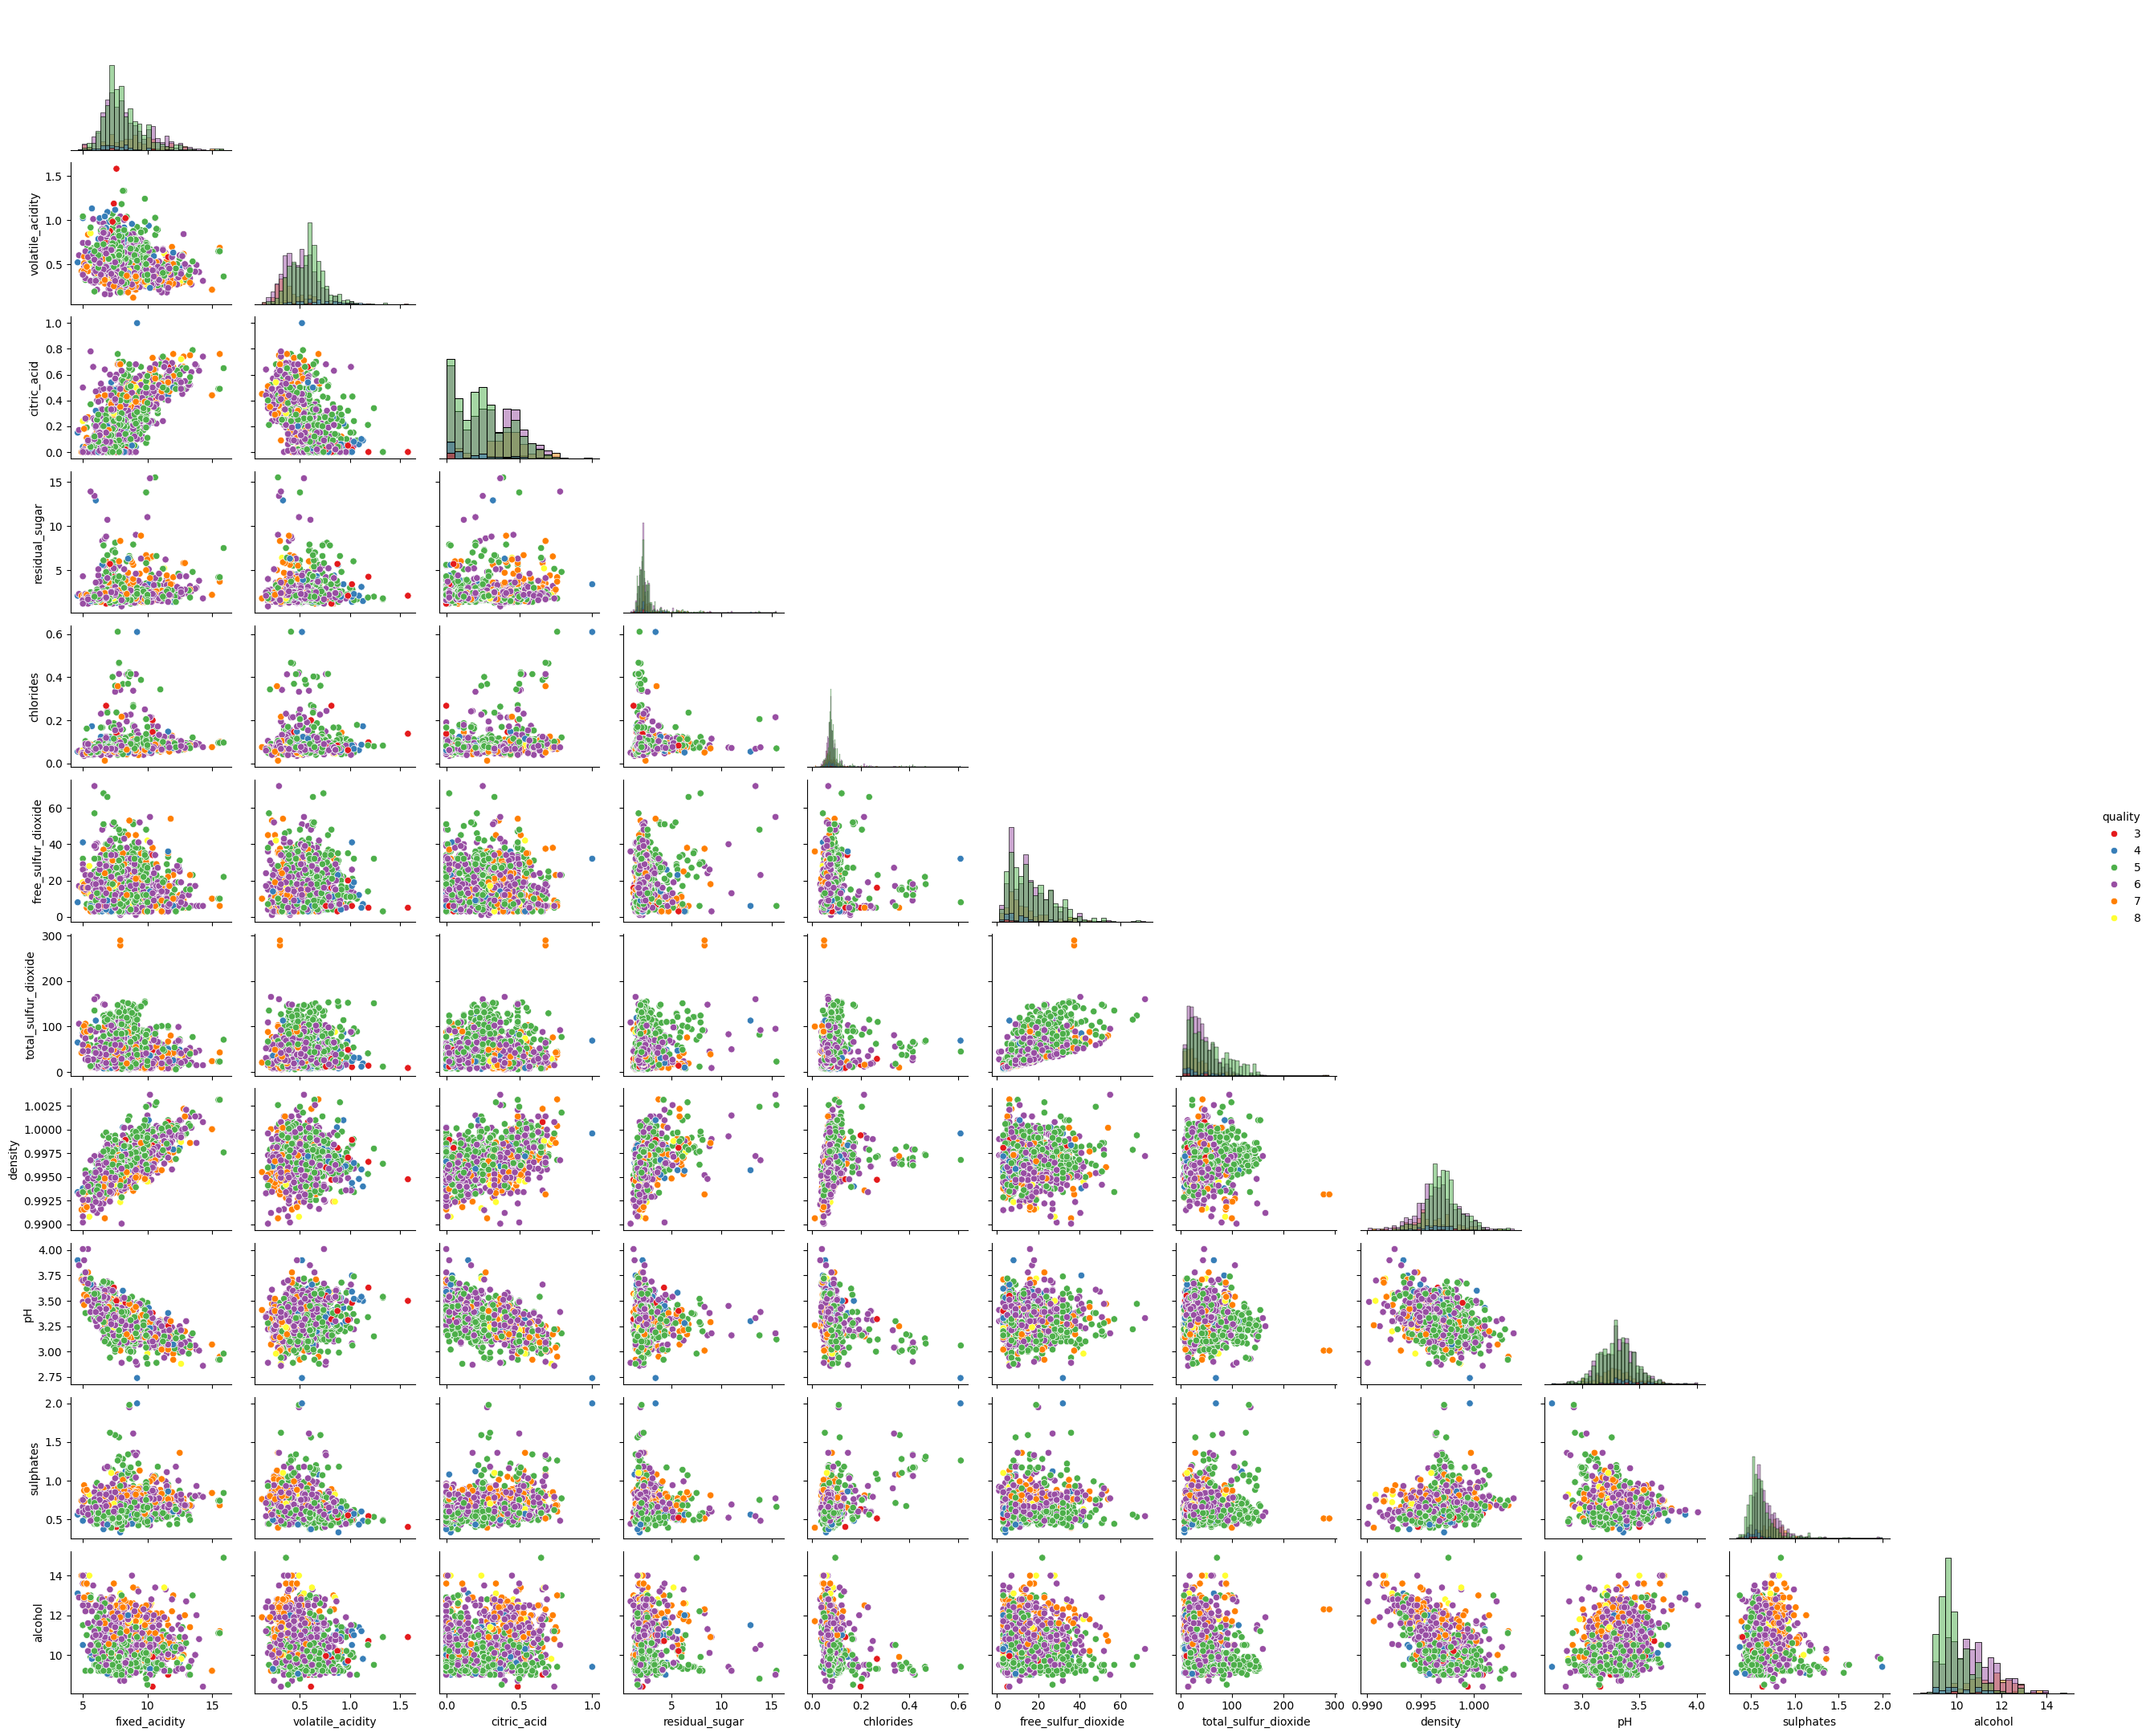

In [10]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 2, aspect = 1.2, corner = True, palette="Set1")

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">         
Здесь мы видим, что между некоторыми переменными есть корреляция и это именно то, чего мы бы не хотели видеть. При дальнейшем использовании моделей, у которых в основе расчета весовых коэффициентов заложена корреляция может привести к проблеме **«мультиколлинеарности»**
</bin>

## Тепловая карта

<Axes: >

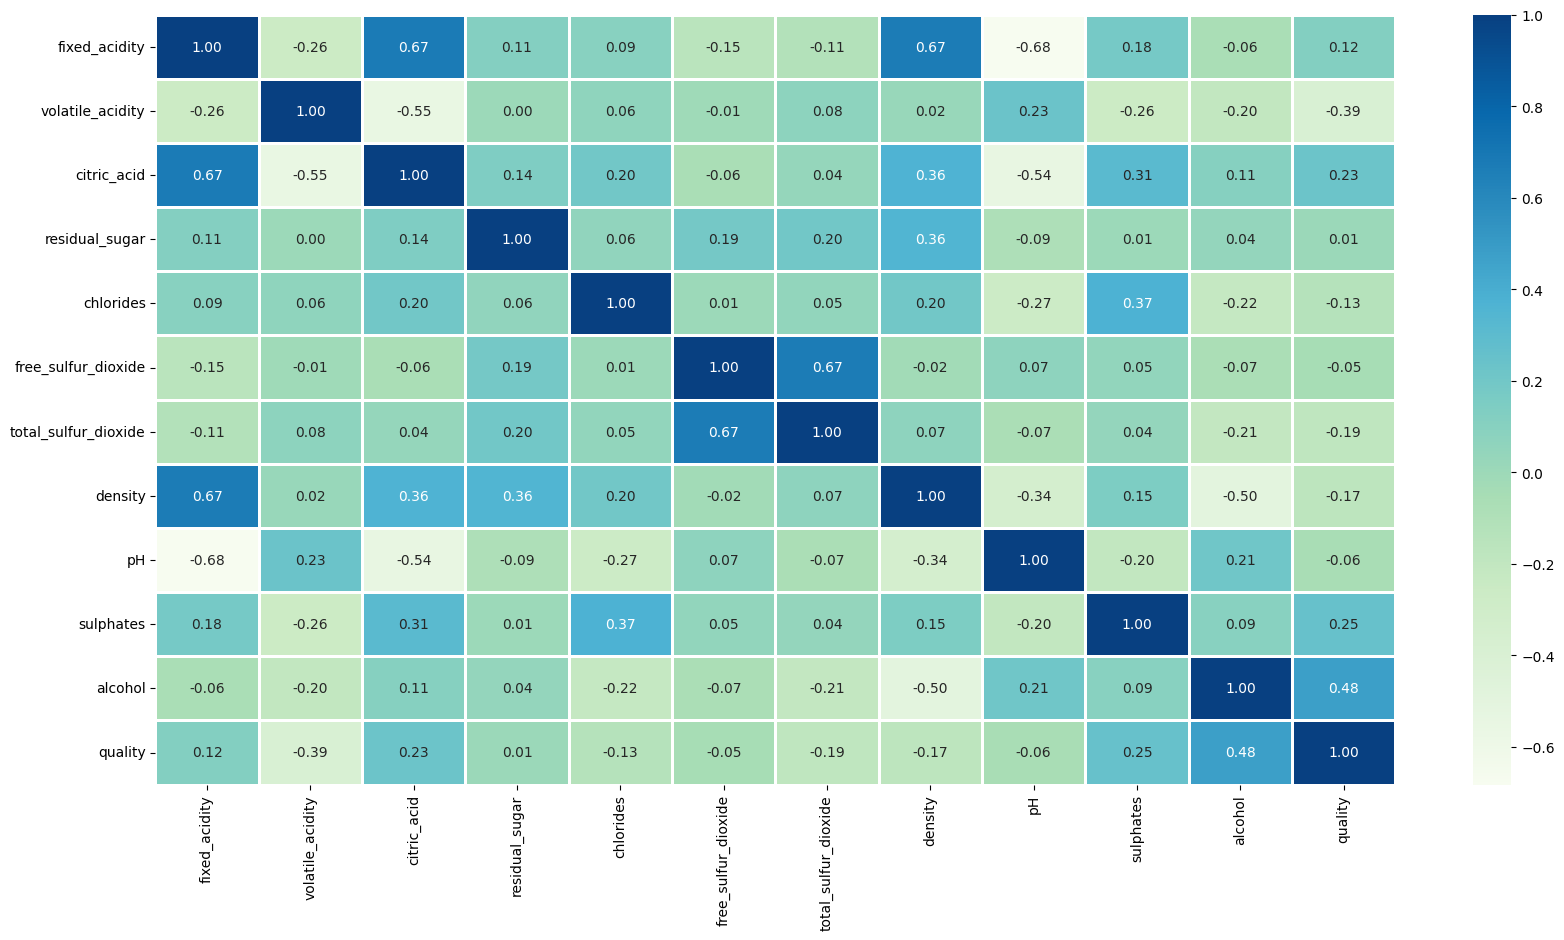

In [11]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "GnBu",  fmt='.2f')

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">            
Здесь мы видим, что существует относительно высокая (0,67, положительная) корреляция между переменными `free sulfur dioxide` «свободный диоксид серы» и `total_sulfur_dioxide` «общее количество_диоксида серы». 

Существует относительно высокая (-0,68, отрицательная) корреляция между `pH` и `fixed_acidity` «иксированной кислотностью». А между некоторыми другими переменными корреляция составляет около 0,5.

Данные признаки остаются в пределе нормы, поэтому удалять их нет необходимости. 
</bin>

In [12]:
list = (df[["alcohol","density"]].corr(), 
        df[["fixed_acidity","pH"]].corr(),
        df[["citric_acid","pH"]].corr(), 
        df[["fixed_acidity","density"]].corr(),
        df[["free_sulfur_dioxide","total_sulfur_dioxide"]].corr())

for corr in list:
    print(corr, "\n")

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 

               fixed_acidity        pH
fixed_acidity       1.000000 -0.682978
pH                 -0.682978  1.000000 

             citric_acid        pH
citric_acid     1.000000 -0.541904
pH             -0.541904  1.000000 

               fixed_acidity   density
fixed_acidity       1.000000  0.668047
density             0.668047  1.000000 

                      free_sulfur_dioxide  total_sulfur_dioxide
free_sulfur_dioxide              1.000000              0.667666
total_sulfur_dioxide             0.667666              1.000000 



## Коэффицент корреляции пирсона

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">  
Рассмотрим коэффициент корреляции Пирсона между заинтересовавшими нас переменными и p-value. 
</bin>

In [13]:
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.4961797702417019, pvalue=3.9388353399870764e-100)


In [14]:
print("Pearson correlation coefficient:", st.pearsonr(df["free_sulfur_dioxide"],
                                                      df["total_sulfur_dioxide"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810215, pvalue=6.404722954681174e-207)


In [15]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685319, pvalue=4.063034039841015e-220)


In [16]:
print("Pearson correlation coefficient:", st.pearsonr(df["citric_acid"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395099, pvalue=1.007201325911255e-122)


In [17]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189741, pvalue=3.0747470608584777e-207)


<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Результаты показали, что существует статистически значимая прямая/отрицательная корреляция между переменными. Было принято сохранить признаки, т.к. коэффициент не такой большой.
</bin> 

# Анализ целевой переменной

Text(0.5, 1.0, 'Гистограмма quality')

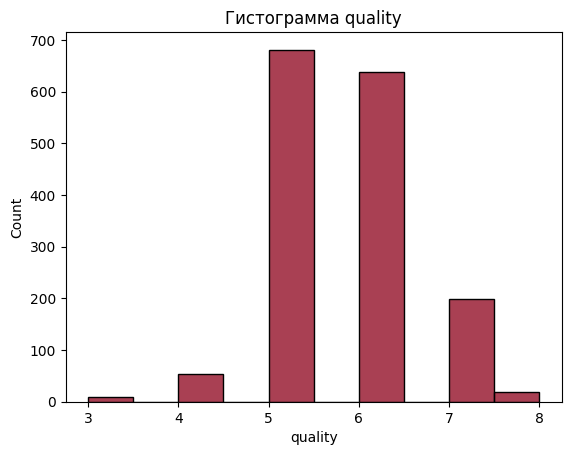

In [18]:
sns.histplot(x = df['quality'],
             bins=10,
             kde=False,
             color=COLOR).set_title('Гистограмма quality')

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Как мы видим из данной гистограммы оценка экспертов находится в диапазоне от 3 до 8, хотя изначально это 10 бальная шкала, некоторые классы полностью отсутствуют из этого и вытекает сильный дисбаланс классов целевой метрики. 
</bin>

# Предварительная обработка данных

## Изменим диапазона оценки


<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">             
Тем самым сведем задачу к бинарной классификации.


В этом наборе данных диапазон качества составляет от 3 до 8. Мы разделим диапазон качества на две части:
* Высококачественное вино: 6 - 8 
* Вино низкого качества: 3 - 5
</bin>

In [19]:
df["quality"] = np.where(df["quality"] >= 6, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [20]:
#оцениваем изменения
df.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1


Text(0.5, 1.0, 'Гистограмма quality')

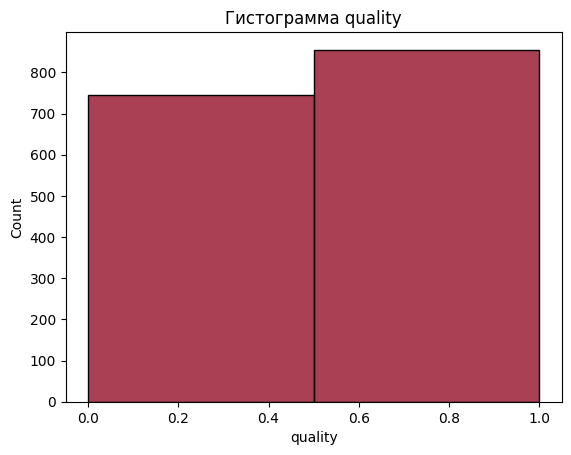

In [21]:
#Посмотрим на получившиеся классы
sns.histplot(x = df['quality'],
             bins=2,
             kde=False,
             color=COLOR).set_title('Гистограмма quality')

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Классы практически между собой равны, так что дисбаланс не наблюдается. 
</bin>

## Определяем зависимую и независимые переменные.

In [22]:
x = df.drop('quality', axis=1)

y = df['quality']

## Разобьём набор данных на обучающие, валидационную и тестовую выборку. 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = RANDOM_STATE)

In [24]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = RANDOM_STATE)

In [25]:
#проверка разбиения данных
print('Размер тренировочной выборки', x_train.shape, y_train.shape)
print('Размер валидационной выборки', x_val.shape, y_val.shape)
print('Размер тестовой выборки', x_test.shape, y_test.shape)

Размер тренировочной выборки (1119, 11) (1119,)
Размер валидационной выборки (240, 11) (240,)
Размер тестовой выборки (240, 11) (240,)


## Стандартизация (нормализация) независимых переменных

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 

Нормализация позволяет привести различные переменные к одному масштабу (0, 1), что очень важно для многих алгоритмов машинного обучения. Т.К. переменные, которые измеряются в разных масштабах, не вносят одинаковый вклад в анализ и могут в конечном итоге создать помехи.

Мы будем использовать **MinMaxScaler** для нормализации этого набора данных. Он хорошо подходит, когда распределение данных не является нормальным (как мы выяснили это наш случай) или когда алгоритмы требуют, чтобы данные находились в определенном диапазоне.
</bin>

In [26]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_val = norm.transform(x_val)
x_test = norm.transform(x_test)

# ПОСТРОЕНИЕ МОДЕЛЕЙ

## Модель K-ближайших соседей (KNN)

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
В статистике алгоритм k-ближайших соседей (k-NN) представляет собой непараметрический метод обучения с учителем. Он применим для задач классификации и регрессии. В обоих случаях входные данные состоят из k-ближайших обучающих примеров в наборе данных.

Принятие решения для задачи классификации: определение класса нового объекта основывается на классах его K-ближайших соседей. Например, если большинство из K соседей принадлежат классу "1", то новый объект также будет отнесен к классу "1".

Особенностью алгоритма k-NN является то, что он чувствителен к локальной структуре данных, выбросам и необходимостью предварительной нормализации Н.П.
</bin>

In [27]:
#подбор параметров по сетке
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 4)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [28]:
# Лучшие параметры модели KNN
print("Лучший результат train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("Количество соседей K: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nЛучшие веса: " + knn_cv_model.best_params_["weights"],
     "\nЛучший размер листа: " + str(knn_cv_model.best_params_["leaf_size"]))

Лучший результат train set: 0.788181643625192
____________________________________________
Количество соседей K: 19 
Лучшие веса: distance 
Лучший размер листа: 25


In [29]:
#Обучим модель на подобранных параметрах 
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=19, weights='distance')

In [30]:
#Оценим точность knn на `val`выборке:
y_pred = knn_model.predict(x_val)
accuracy_score(y_val, y_pred)

0.775

In [31]:
#Посмотрим метрики для KNN Model:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        94
           1       0.84      0.78      0.81       146

    accuracy                           0.78       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.78      0.78      0.78       240



## Модель Gradient Boosting Machines (GBM)

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;"> 
Это метод машинного обучения, используемый, в задачах регрессии и классификации. Этот метод является ансамблевым, что означает, что он объединяет несколько слабых моделей, таких как решающие деревья, в единую сильную модель. Обучение моделей происходит последовательно, каждая следующая модель корректирует ошибки предыдущей, учась на остатках, и комбинирует их взвешенным образом, уменьшая ошибку предсказания и повышая общую производительность модели.

Данный метод обладает хорошей обобщающей способностью и эффективно справляется с выбросами в данных. Однако, он также более склонен к переобучению, поэтому важно следить за параметрами обучения и контролировать глубину деревьев и другие гиперпараметры
</bin>

In [32]:
gbm = GradientBoostingClassifier()

In [33]:
# подбор параметров по сетке
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 4, n_jobs = -1)
gbm_cv_model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]})

In [34]:
# Лучшие подобранные параметры модели
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.7899577572964669
__________________________________________________________
best learning_rate value: 0.1 
best n_estimators value: 150 
best max_depth value: 4 
best min_samples_split value: 2


In [35]:
# Обучим модель на подобранных параметрах:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.
                                 best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(x_train, y_train)

In [36]:
# Оценим точность GBM на `val` выборке:
y_pred = gbm_model.predict(x_val)
round(accuracy_score(y_val, y_pred), 2)

0.78

In [37]:
#Посмотрим и другие метрики GBM Model:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        94
           1       0.85      0.77      0.81       146

    accuracy                           0.78       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.79      0.78      0.78       240



## Light GBM Model

In [38]:
lgbm = LGBMClassifier()

In [39]:
#подбор параметров по сетке
lgbm_params = {"n_estimators": [80, 100, 120, 150, 200],
              "max_depth": [-1, 3, 4],
              "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
              "min_child_samples": [15, 20, 25, 30]}


lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 4, n_jobs = -1)
lgbm_cv_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 586, number of negative: 533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 1119, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523682 -> initscore=0.094798
[LightGBM] [Info] Start training from score 0.094798


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
                         'max_depth': [-1, 3, 4],
                         'min_child_samples': [15, 20, 25, 30],
                         'n_estimators': [80, 100, 120, 150, 200]})

In [40]:
#Лучшие подобранные параметры
print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("____________________________________________")

print("best learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.8033538146441372
____________________________________________
best learning_rate value: 0.05 
best n_estimators value: 150 
best max_depth value: -1 
best min_child_samples value: 20


In [41]:
# Обучим модель на подобранных параметрах
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                      max_depth = lgbm_cv_model.best_params_["max_depth"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"])
lgbm_model = lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 586, number of negative: 533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 1119, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523682 -> initscore=0.094798
[LightGBM] [Info] Start training from score 0.094798


In [42]:
#Оценим точность Light GBM на `val` выборке:
y_pred = lgbm_model.predict(x_val)
accuracy_score(y_val, y_pred)

0.7791666666666667

In [43]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        94
           1       0.85      0.77      0.81       146

    accuracy                           0.78       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.79      0.78      0.78       240



# Оценка качества лучшей модели

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">

Лучший результат показала модель Gradient Boosting, поэтому ее и выбираем для тестового прогона. 
</bin>

In [44]:
y_pred = gbm_model.predict(x_test)
round(accuracy_score(y_test, y_pred), 2)

0.76

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       117
           1       0.77      0.76      0.77       123

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240



<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">             
Вывод: как мы видим качество модели сохранилось на том же уровне, что говорит об отсутствии переобучения. 

</bin>

# ROC-AUC для GBM Model

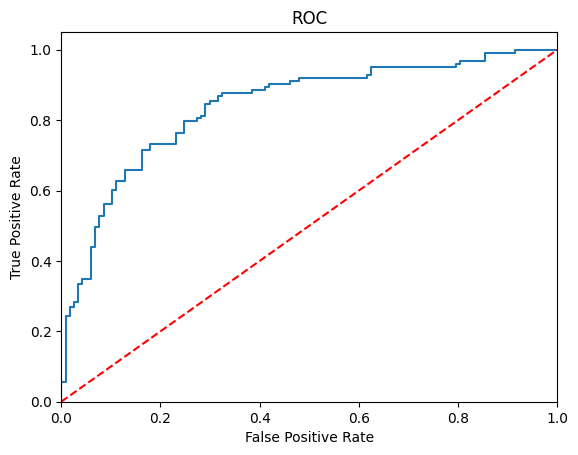

In [46]:
gbm_roc_auc = roc_auc_score(y_test, gbm_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<div style="border-radius: 15px; /* Закругление углов */
            background-color: #f0f8ff; /* Пастельно-голубой цвет фона */
            padding: 10px; /* Внутренний отступ */
            font-size: 110%; /* Размер шрифта */
            text-align: left; /* Выравнивание по центру */
            color: #333333;">         

**Подведем итог**

Разработанная модель успешно справляется с поставленной задачей, позволяя различить хорошее вино от плохого на основе его химического состава с точностью 76%.
</bin>